In [203]:
import os
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pylab as pl

import torch
import torch.nn as nn
import torch.nn.functional as F

from utils import *

# Pedestrian Dataset

In [204]:
from sknetwork.topology import get_connected_components

In [205]:
!ls data/pedestrian/all/

ETH
Hotel
examples_all_unnormalized_ETH.pkl
examples_all_unnormalized_Hotel.pkl
examples_all_unnormalized_students03.pkl
examples_all_unnormalized_zara01.pkl
examples_all_unnormalized_zara02.pkl
labels_all_ETH.pkl
labels_all_Hotel.pkl
labels_all_students03.pkl
labels_all_zara01.pkl
labels_all_zara02.pkl
students03
zara01
zara02


In [206]:
data_folder = "data/pedestrian/all"

In [207]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

In [208]:
examples_path_eth = os.path.join(data_folder, "examples_all_unnormalized_students03.pkl")
labels_path_eth = os.path.join(data_folder, "labels_all_students03.pkl")
with open(examples_path_eth, "rb") as f:
    examples_eth = pickle.load(f)
with open(labels_path_eth, "rb") as f:
    labels_eth = pickle.load(f)

In [209]:
idx = 0 #scene id
example = examples_eth[idx]
label = labels_eth[idx]
num_atoms = example.shape[0]
rel_rec, rel_send = create_edgeNode_relation(num_atoms, self_loops=False)
label = torch.diag_embed(label)
label_gr = torch.matmul(rel_send.t().long(), torch.matmul(label, rel_rec.long()))
label_gr = label_gr.numpy()
#get connected components

gIDs = get_connected_components(label_gr)

In [210]:
gIDs

array([ 0,  1,  2,  3,  4,  4,  5,  6,  6,  6,  6,  7,  7,  7,  8,  8,  9,
       10, 10, 11, 11, 11,  5, 12, 13, 13, 13, 14, 14,  3,  3,  3,  3, 15,
       16, 17, 17], dtype=int32)

In [223]:
## Define colours
n = np.unique(gIDs).shape[0]
n
colors = pl.cm.jet(np.linspace(0,2,n))

In [220]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

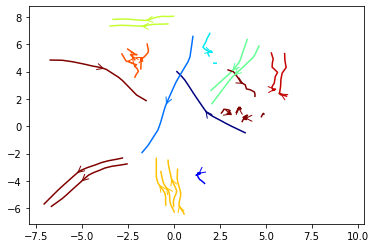

In [225]:
colormap = {0:'red',1:'blue',2:'orange',3:'black',4:'green',5:"yellow",6:"purple",
           7:"grey",8:"cyan"}

for i in range(len(example)):
    traj = example[i]
    x = traj[:,0]
    y = traj[:,1]
    line = plt.plot(x,y, color=colors[gIDs[i]])[0]
    add_arrow(line)
    
plt.show()

# Group Spring Simulation

In [227]:
!ls data/simulation/spring_simulation/

__pycache__
datainfo_static_5.npy
edges_all_test_group_static_5.npy
edges_all_train_group_static_5.npy
edges_all_valid_group_static_5.npy
edges_sampled_all_test_group_static_5.npy
edges_sampled_all_train_group_static_5.npy
edges_sampled_all_valid_group_static_5.npy
ga_test_group_static_5.npy
ga_train_group_static_5.npy
ga_valid_group_static_5.npy
generate_dataset.py
generate_dataset_group.py
gr_test_group_static_5.npy
gr_train_group_static_5.npy
gr_valid_group_static_5.npy
loc_all_test_group_static_5.npy
loc_all_train_group_static_5.npy
loc_all_valid_group_static_5.npy
loc_sampled_all_test_group_static_5.npy
loc_sampled_all_train_group_static_20.npy
loc_sampled_all_train_group_static_5.npy
loc_sampled_all_valid_group_static_5.npy
sampled_indices_all_test_group_static_5.npy
sampled_indices_all_train_group_static_5.npy
sampled_indices_all_valid_group_static_5.npy
spring_sim.py
spring_sim_group.py
test_data_loader_static_5.pth
train_data_loader_static_5.pth
valid_data_loader_static_5.pth


In [228]:
data_folder = "data/simulation/spring_simulation/"

In [232]:
ga_test = np.load(os.path.join(data_folder, "ga_test_group_static_5.npy"))
loc_test = np.load(os.path.join(data_folder, "loc_all_test_group_static_5.npy"))

In [269]:
sim_id = 150
ga_i = ga_test[sim_id]
locs_i = loc_test[sim_id]

In [270]:
ga_i

array([0, 0, 1, 3, 0])

In [271]:
locs_i.shape

(5000, 2, 5)

In [272]:
cmap = {0:"black", 1:"red", 2:"blue", 3:"orange", 4:"green"}

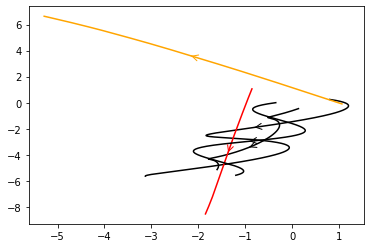

In [273]:
for i in range(locs_i.shape[-1]):
    traj = locs_i[:,:,i]
    x = traj[:,0]
    y = traj[:,1]
    line = plt.plot(x,y, color = cmap[ga_i[i]])[0]
    add_arrow(line)
    
plt.show()